In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load the dataset 
titanic_df = pd.read_csv("C:/Users/Gurinder/Desktop/Brainy Tasks/tested.csv")

In [12]:
# Display initial rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# Generate a simulated 'Date' column
# Generate a random start date and assign sequential dates
titanic_df['Date'] = pd.date_range(start='2023-01-01', periods=len(titanic_df), freq='D')

In [14]:
# Set 'Date' as the index
titanic_df.set_index('Date', inplace=True)

In [15]:
# Resample data to analyze trends over time
# Example: Monthly average fare
monthly_fare = titanic_df['Fare'].resample('M').mean()
print("\nMonthly Average Fare:")
print(monthly_fare)


Monthly Average Fare:
Date
2023-01-31    31.237906
2023-02-28    32.554764
2023-03-31    57.935213
2023-04-30    26.863060
2023-05-31    33.897445
2023-06-30    29.747410
2023-07-31    38.784810
2023-08-31    40.251474
2023-09-30    24.588753
2023-10-31    19.888577
2023-11-30    39.777360
2023-12-31    42.030384
2024-01-31    39.390858
2024-02-29    42.706245
Freq: M, Name: Fare, dtype: float64


In [16]:
# Weekly survival rate
weekly_survival_rate = titanic_df['Survived'].resample('W').mean()
print("\nWeekly Survival Rate:")
print(weekly_survival_rate)


Weekly Survival Rate:
Date
2023-01-01    0.000000
2023-01-08    0.428571
2023-01-15    0.428571
2023-01-22    0.428571
2023-01-29    0.428571
                ...   
2024-01-28    0.142857
2024-02-04    0.285714
2024-02-11    0.285714
2024-02-18    0.714286
2024-02-25    0.250000
Freq: W-SUN, Name: Survived, Length: 61, dtype: float64


In [17]:
# Calculate rolling statistics
# Example: 7-day rolling average of Fare
titanic_df['Rolling_Fare'] = titanic_df['Fare'].rolling(window=7).mean()

In [18]:
# Lagging data
# Example: Shift Fare data by 1 day
titanic_df['Lagged_Fare'] = titanic_df['Fare'].shift(1)

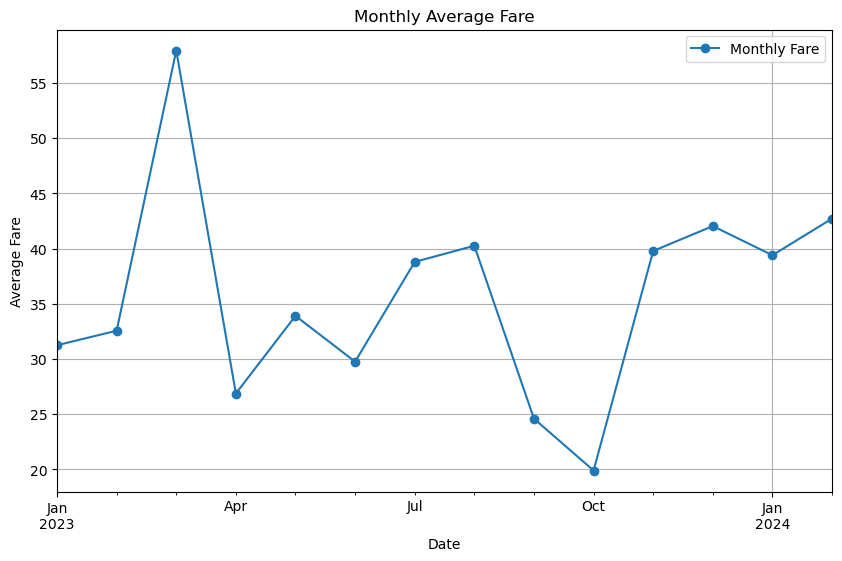

In [19]:
# Visualization
# Plot monthly average fare
plt.figure(figsize=(10, 6))
monthly_fare.plot(title="Monthly Average Fare", label='Monthly Fare', marker='o')
plt.xlabel("Date")
plt.ylabel("Average Fare")
plt.legend()
plt.grid()
plt.show()

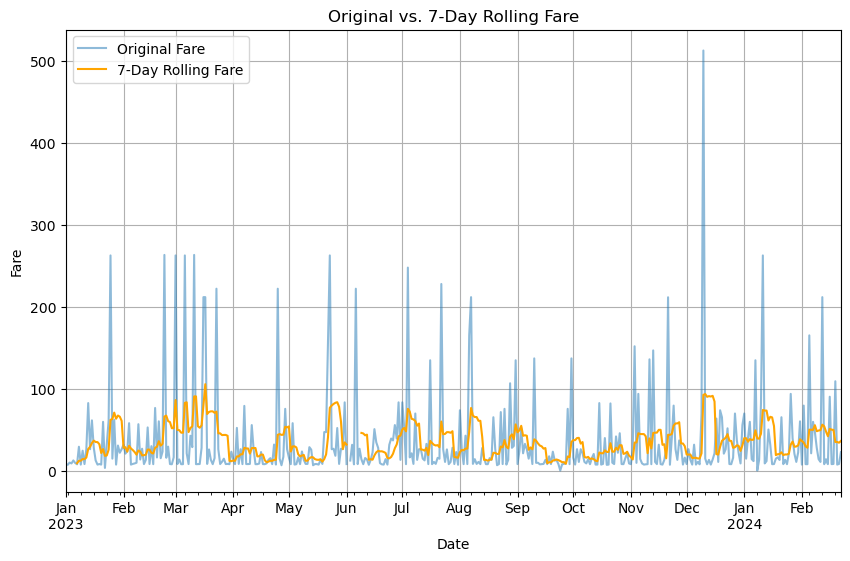

In [20]:
# Plot rolling fare and original fare for comparison
plt.figure(figsize=(10, 6))
titanic_df['Fare'].plot(label='Original Fare', alpha=0.5)
titanic_df['Rolling_Fare'].plot(label='7-Day Rolling Fare', color='orange')
plt.title("Original vs. 7-Day Rolling Fare")
plt.xlabel("Date")
plt.ylabel("Fare")
plt.legend()
plt.grid()
plt.show()

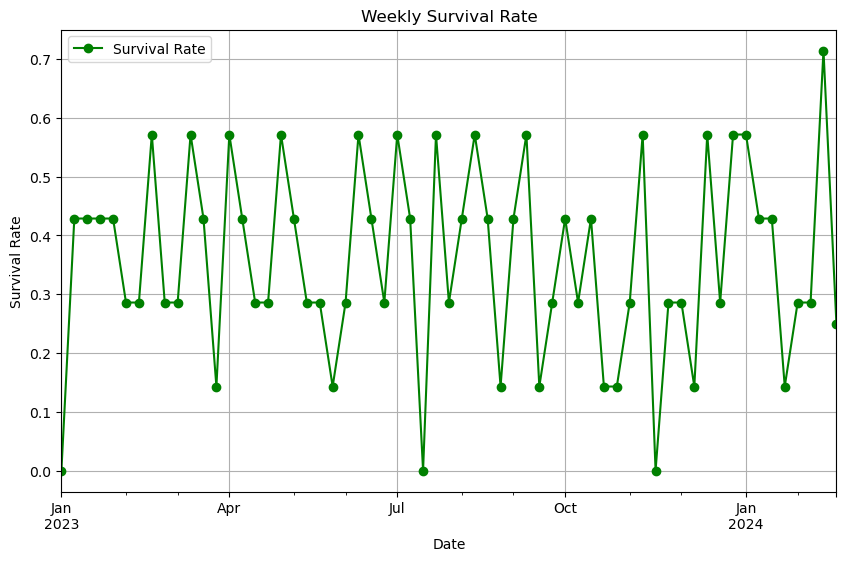

In [21]:
# Plot weekly survival rate
plt.figure(figsize=(10, 6))
weekly_survival_rate.plot(title="Weekly Survival Rate", label='Survival Rate', color='green', marker='o')
plt.xlabel("Date")
plt.ylabel("Survival Rate")
plt.legend()
plt.grid()
plt.show()

In [22]:
# Display the first few rows of the DataFrame with the new columns
print("\nDataFrame with Rolling and Lagged Fare:")
print(titanic_df[['Fare', 'Rolling_Fare', 'Lagged_Fare']].head(15))


DataFrame with Rolling and Lagged Fare:
               Fare  Rolling_Fare  Lagged_Fare
Date                                          
2023-01-01   7.8292           NaN          NaN
2023-01-02   7.0000           NaN       7.8292
2023-01-03   9.6875           NaN       7.0000
2023-01-04   8.6625           NaN       9.6875
2023-01-05  12.2875           NaN       8.6625
2023-01-06   9.2250           NaN      12.2875
2023-01-07   7.6292      8.902986       9.2250
2023-01-08  29.0000     11.927386       7.6292
2023-01-09   7.2292     11.960129      29.0000
2023-01-10  24.1500     14.026200       7.2292
2023-01-11   7.8958     13.916671      24.1500
2023-01-12  26.0000     15.875600       7.8958
2023-01-13  82.2667     26.310129      26.0000
2023-01-14  26.0000     28.934529      82.2667
2023-01-15  61.1750     33.530957      26.0000
